# <font color=darkblue>ENGR 1330-2022 Exam 4 - Laboratory Portion  </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Exam 4 - Demonstrate Laboratory/Programming Skills

---
**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [s22-ex4-deploy.ipynb](http://54.243.252.9/engr-1330-webroot/5-ExamProblems/Exam4/spring2022/s22-ex4-deploy.ipynb)

**If you are unable to download the Jupyter file, create an empty notebook and copy paste the problems into Markdown cells and Code cells (problem-by-problem)**


## Problem 0.0 (2 pts) : <font color = 'magenta'>*Profile your computer*</font>

Execute the code cell below exactly as written.  If you get an error just continue to the remaining problems.

In [37]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
bigstring = "import matplotlib.pyplot as plt\nimport qrcode\nimg=qrcode.make('R00000000')\nimport matplotlib.image as mpimg\nimgplot = plt.imshow(img)\nplt.show()"
exec(bigstring)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


ModuleNotFoundError: No module named 'qrcode'

## Problem 0.1 (3 pts) : <font color = 'magenta'>*Read the csv data file*</font>

Import the database file directly into a Pandas dataframe object. Execute the code cell exactly as written.


In [38]:
import pandas as pd
url = "http://54.243.252.9/engr-1330-webroot/4-Databases/EcommerceCustomers.csv"
dataset = pd.read_csv(url)

## Problem 1 (5 pts) : <font color = 'magenta'>*Import any remaining libraries and describe the dataframe </font>

In [39]:
#GIVE YOUR ANSWER FOR Problem-1 IN THIS CELL
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

dataset.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,33.052400,12.052600,37.06100,3.532800,499.320000
std,0.992767,0.995588,1.01109,0.999581,79.318045
min,29.500000,8.500000,33.90000,0.300000,257.000000
25%,32.300000,11.400000,36.37500,2.900000,445.000000
50%,33.100000,12.000000,37.10000,3.500000,499.000000
75%,33.700000,12.800000,37.70000,4.100000,549.250000
max,36.100000,15.100000,40.00000,6.900000,766.000000


# The dataframe lists the email, Adress, and avatar of 

# ecommerce customers and lists each persons information

# namely the average time they play, time on the app,

# time on their website, how long theyve been a member,

# and the yearly amount of money they spend on their  app

# with this information tons of data can be analyzed 

# to maximize profits.

## Problem 2: <font color = 'magenta'>*We will be working with an ecommerce dataset to predict the customer’s yearly spending amount in dollars based on 4 features, namely, average session length in minutes (average in-store style advice sessions), time on app in minutes, time on website in minutes, length of membership in years. Specific tasks for this exercise are given below.*</font>

**Task-1 (5 pts):** Read the **`EcommerceCustomers.csv`** file and store it in a variable named **`ecommerce`**. Display the first 5 rows of the dataframe **`ecommerce`**.

> <font color="blue">**Problem 0.1 above should automatically load the file into the object `dataset`. <br> If that fails, the CSV file is located at [http://54.243.252.9/engr-1330-webroot/4-Databases/EcommerceCustomers.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/EcommerceCustomers.csv)**</font>

In [40]:
#GIVE YOUR ANSWER FOR TASK-1 IN THIS CELL

ecommerce = pd.read_csv('EcommerceCustomers.csv')

ecommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.5,12.7,39.6,4.1,588
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.9,11.1,37.3,2.7,392
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.0,11.3,37.1,4.1,488
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.3,13.7,36.7,3.1,582
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.3,12.8,37.5,4.4,599


**Task-2 (5 pts):** Get the information (i.e, the number of rows and the data types present in each column) and the basic statistical measures about the dataframe **`ecommerce`** using the appropriate functions.

In [41]:
#GIVE YOUR ANSWER FOR TASK-2 IN THIS CELL
print('The total number of rows are',ecommerce.shape[0], 'And the total number of columns are', ecommerce.shape[1],'!') # returns the numver of rows and columns

dataType = ecommerce.dtypes
print('========================')
print('These are the data types of each column')
print(dataType)

The total number of rows are 500 And the total number of columns are 8 !
These are the data types of each column
Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent       int64
dtype: object


**Task-3 (5 pts):** Display the plot between all paramaters in the dataset using the appropriate plotting function in the Seaborn library.

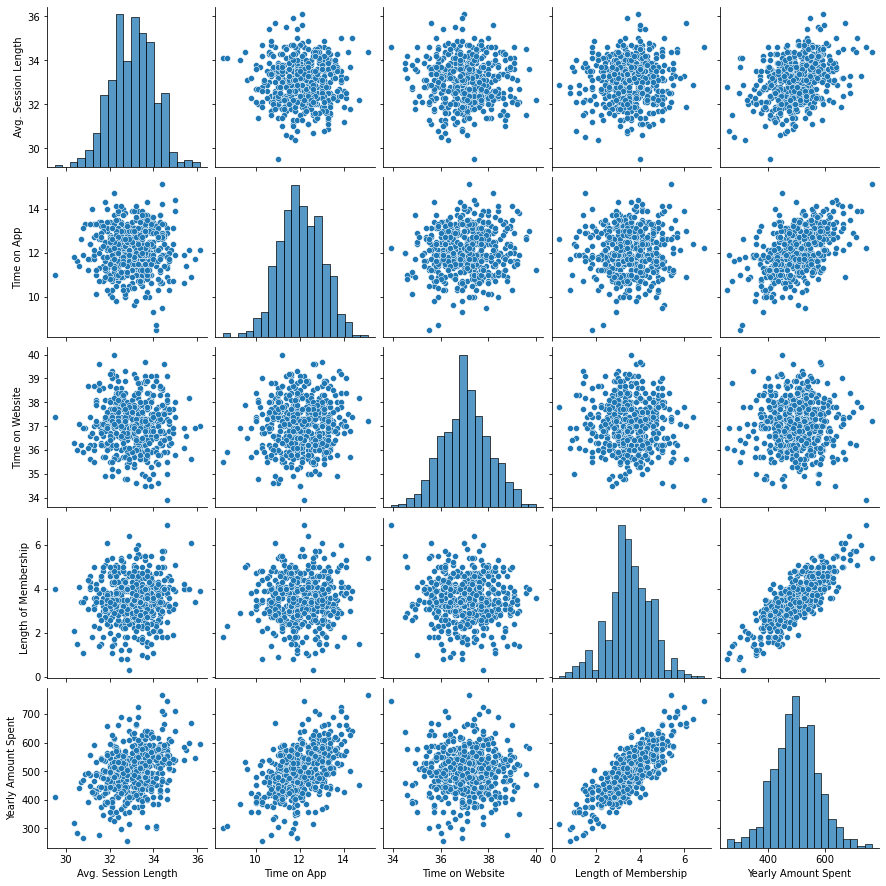

In [42]:
#GIVE YOUR ANSWER FOR TASK-3 IN THIS CELL

sns.pairplot(ecommerce)
plt.show()

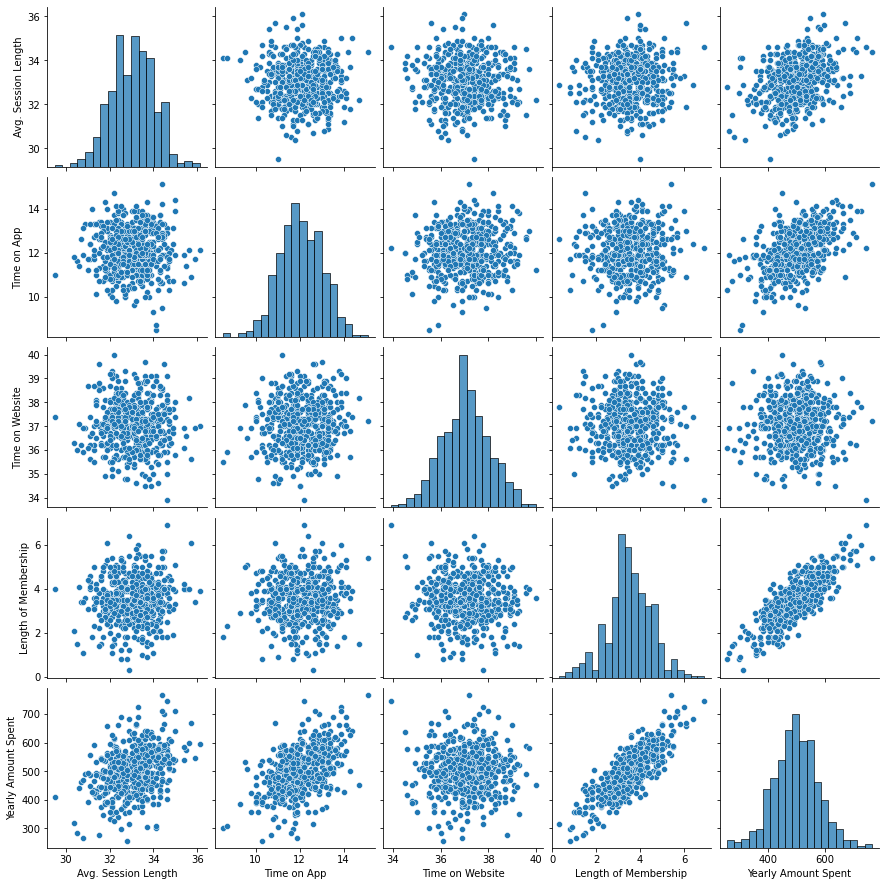

In [9]:
sns.pairplot(ecommerce, diag_kind="hist")


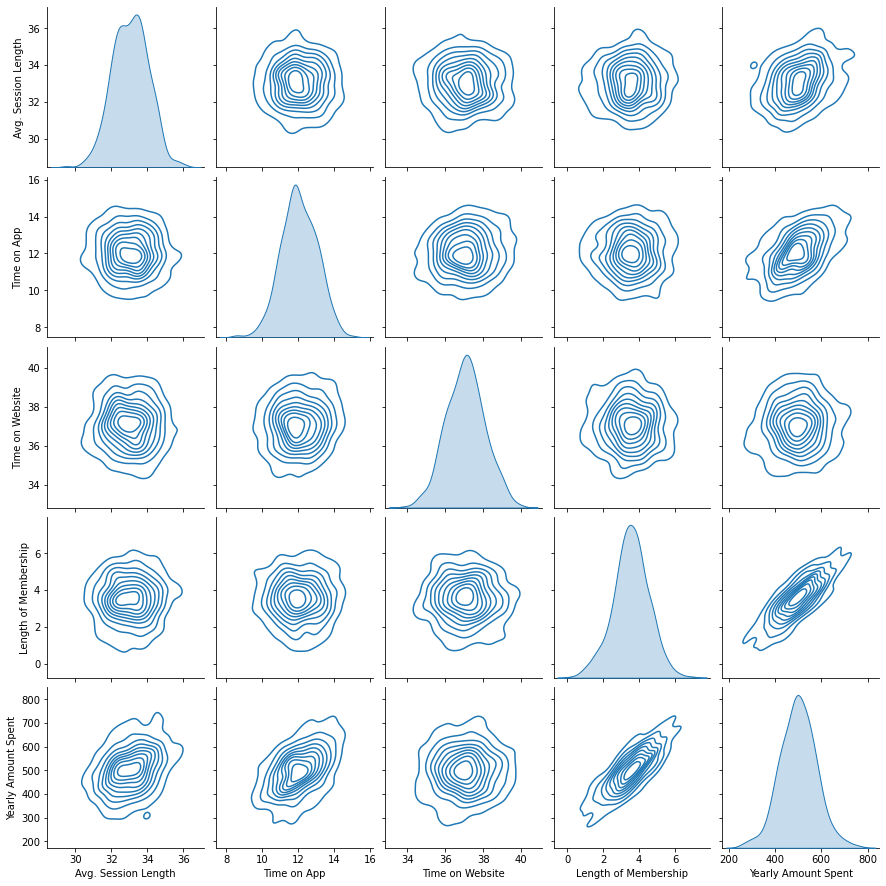

In [10]:
sns.pairplot(ecommerce, kind="kde")


# I added several models for completion


**Task-4: (5 pts)** Compute the correlation coefficient between all parameters in the dataset using the appropriate function in the Pandas library and store it in a variable named **`corr`**. Display the heat map of correlation values stored in **`corr`** using the appropriate function in the Seaborn library. The heat map must display an appropriate title. Identfy if there is any colinearity between the input parameters.

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.026253        -0.034575   
Time on App                     -0.026253     1.000000         0.084760   
Time on Website                 -0.034575     0.084760         1.000000   
Length of Membership             0.061958     0.028690        -0.049037   
Yearly Amount Spent              0.356523     0.497717        -0.003118   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.061958             0.356523  
Time on App                       0.028690             0.497717  
Time on Website                  -0.049037            -0.003118  
Length of Membership              1.000000             0.809364  
Yearly Amount Spent               0.809364             1.000000  


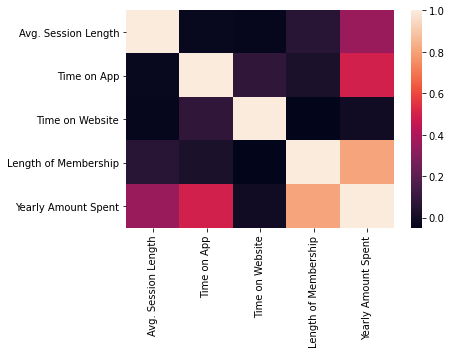

In [11]:
#GIVE YOUR ANSWER FOR TASK-4 IN THIS CELL
#make this more general, find the correlation matrix. generate the heatmap
corr = ecommerce.corr()
print(corr)

sns.heatmap(ecommerce.corr());



**Task-5: (5 pts)** Index and pick the 4 feature columns and store it in a variable named **`x`**. Similarly, index and pick the column named **`Yearly Amount Spent`** and store it in a variable named **`y`**. Print the first 5 rows of **`x`** and **`y`** to the output.

In [20]:
#GIVE YOUR ANSWER FOR TASK-5 IN THIS CELL
y = ecommerce['Yearly Amount Spent']
x = ecommerce.drop(columns=['Yearly Amount Spent', 'Email','Address','Avatar'] , axis=1)
#x = ecommerce.drop(columns=['Email'] , axis=1)
#x = ecommerce.drop(columns=['Address'] , axis=1)
#x = ecommerce.drop(columns=['Avatar'] , axis=1)



print(x)
print('=================================================-')
print(y)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0                   34.5         12.7             39.6                   4.1
1                   31.9         11.1             37.3                   2.7
2                   33.0         11.3             37.1                   4.1
3                   34.3         13.7             36.7                   3.1
4                   33.3         12.8             37.5                   4.4
..                   ...          ...              ...                   ...
495                 33.2         13.6             36.4                   3.7
496                 34.7         11.7             37.2                   3.6
497                 32.6         11.5             38.3                   5.0
498                 33.3         12.4             36.8                   2.3
499                 33.7         12.4             35.8                   2.7

[500 rows x 4 columns]
=================================================-
0

**Task-6 (5 pts):** Randomly (without replacement) pick 66.66% of the rows from the dataframe **`data`** and store it in a variable named **`training_set`**. Similarly, randomly (without replacement) pick 33.33% of the rows from the dataframe **`data`** and store it in a variable named **`test_set`**.

In [31]:
#GIVE YOUR ANSWER FOR TASK-6 IN THIS CELL
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression



x_train = x.sample(frac=.6666, replace = False)
y_train = y.sample(frac=.6666, replace = False)
x_test =x.sample(frac=.3333, replace = False)
y_test  =y.sample(frac=.3333, replace = False)




**Task-7 (5 pts):** Train the model using **`x_train`** and **`y_train`**. Print the coefficients and the intercept to the output.

In [32]:
# Task 7 goes here


k = LinearRegression()
print(k.fit(x_train,y_train))
print('----------------------------')
print(k.coef_)
print(k.intercept_)



LinearRegression()
----------------------------
[-2.2189509   4.19521231  3.18499642  0.73577379]
406.0245688833435


Mean Absolute error is: 7.891975911150439
Mean Square error is: 99.803890664589
Root Mean square error is: 9.990189721150895
R2 Score is: 0.9850960607668636


C:\Users\medra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


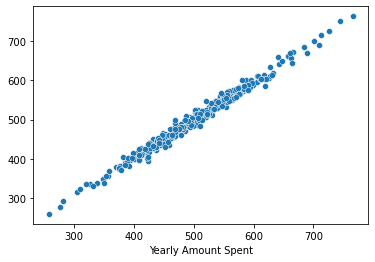

In [34]:
# More in depth analysis


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6666, random_state=101)

k = LinearRegression()
k.fit(x_train,y_train)
k.coef_


predic = k.predict(x_test)


sns.scatterplot(y_test, predic)





mae = metrics.mean_absolute_error(y_test, predic)
mse = metrics.mean_squared_error(y_test, predic)
rmse =  np.sqrt(metrics.mean_squared_error(y_test, predic))
r2 =  metrics.r2_score(y_test,predic)
lin = LinearRegression()

print('Mean Absolute error is:', mae )
print('Mean Square error is:', mse)
print('Root Mean square error is:', rmse)
print('R2 Score is:', r2)


# Now for .33 version

C:\Users\medra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

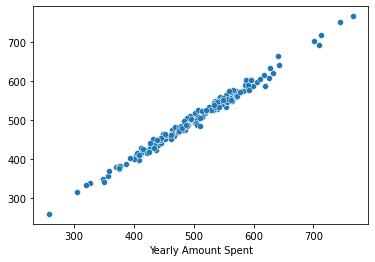

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333, random_state=101)

k = LinearRegression()
k.fit(x_train,y_train)
k.coef_


predic = k.predict(x_test)


sns.scatterplot(y_test, predic)


In [36]:
mae = metrics.mean_absolute_error(y_test, predic)
mse = metrics.mean_squared_error(y_test, predic)
rmse =  np.sqrt(metrics.mean_squared_error(y_test, predic))
r2 =  metrics.r2_score(y_test,predic)

print('Mean Absolute error is:', mae )
print('Mean Square error is:', mse)
print('Root Mean square error is:', rmse)
print('R2 Score is:', r2)

Mean Absolute error is: 7.474829475033762
Mean Square error is: 86.34983305468205
Root Mean square error is: 9.292461087068487
R2 Score is: 0.9874765294165274


**Task-8 (5 pts):** Make a prediction with the found model, use average session length in minutes = first 2 digits of your Rnumber,  time on app in minutes = 2nd 2 digits of your Rnumber, time on website in minutes = 3rd 2 digits of your Rnumber, length of membership in years = 3 years.

Calculate Root mean square error of the model. 